## Load packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import scipy.stats as stats

In [3]:
antifungal = "Itraconazole"
molar_mass = 705.64
date = "2023-01-18"
organism = "Candida albicans"

## Import layout

In [4]:
#source_plate = '../growth_curve_files/plate.xlsx'
source_plate = r"plan_itra_prise1.xlsx"
plate_df = pd.read_excel(source_plate, header=0, index_col=0)
plate_df.head(3)

,strain,conc
well,,
A1,ERG11-DOX C.a,0.025
B1,ERG11-DOX C.a,0.025
C1,ERG11-DOX C.a,0.550


In [5]:
#importation of excel output from the TECAN
source_table1 = r"OD_itra_prise1.xlsx"
source_df = pd.read_excel(source_table1, header=0, index_col=0)
source_df.head()

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,163821s,164722s,165622s,166522s,167422s,168322s,169222s,170122s,171022s,171923s
A1,0.12838,0.12838,0.12833,0.12828,0.12838,0.12855,0.12865,0.12890,0.12925,0.12940,...,1.10920,1.10980,1.10920,1.11020,1.10990,1.11080,1.11100,1.11180,1.11150,1.11220
B1,0.13145,0.13105,0.13103,0.13097,0.13092,0.13103,0.13137,0.13155,0.13185,0.13208,...,1.13400,1.13460,1.13450,1.13540,1.13580,1.13620,1.13610,1.13680,1.13700,1.13760
C1,0.13045,0.13023,0.12993,0.12973,0.12980,0.12995,0.13035,0.13045,0.13055,0.13095,...,0.85542,0.85462,0.85570,0.85678,0.85520,0.85645,0.85645,0.85753,0.85800,0.85915
D1,0.13087,0.13087,0.13053,0.13030,0.13038,0.13025,0.13045,0.13048,0.13105,0.13123,...,0.90060,0.90060,0.90117,0.90090,0.90153,0.90175,0.90187,0.90373,0.90305,0.90395
A2,0.12912,0.12912,0.12895,0.12893,0.12900,0.12955,0.12935,0.12950,0.12972,0.13003,...,1.13570,1.13650,1.13690,1.13720,1.13730,1.13820,1.13790,1.13850,1.13850,1.13880


In [6]:
#conversion of timepoints (s) -> (h)
rename_dict = {}

for col_name in source_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
source_df.rename(columns = rename_dict, inplace=True)

source_df.head()

,0.000000,0.250000,0.500000,0.750000,1.000000,1.250278,1.500278,1.750278,2.000278,2.250278,...,45.505833,45.756111,46.006111,46.256111,46.506111,46.756111,47.006111,47.256111,47.506111,47.756389
A1,0.12838,0.12838,0.12833,0.12828,0.12838,0.12855,0.12865,0.12890,0.12925,0.12940,...,1.10920,1.10980,1.10920,1.11020,1.10990,1.11080,1.11100,1.11180,1.11150,1.11220
B1,0.13145,0.13105,0.13103,0.13097,0.13092,0.13103,0.13137,0.13155,0.13185,0.13208,...,1.13400,1.13460,1.13450,1.13540,1.13580,1.13620,1.13610,1.13680,1.13700,1.13760
C1,0.13045,0.13023,0.12993,0.12973,0.12980,0.12995,0.13035,0.13045,0.13055,0.13095,...,0.85542,0.85462,0.85570,0.85678,0.85520,0.85645,0.85645,0.85753,0.85800,0.85915
D1,0.13087,0.13087,0.13053,0.13030,0.13038,0.13025,0.13045,0.13048,0.13105,0.13123,...,0.90060,0.90060,0.90117,0.90090,0.90153,0.90175,0.90187,0.90373,0.90305,0.90395
A2,0.12912,0.12912,0.12895,0.12893,0.12900,0.12955,0.12935,0.12950,0.12972,0.13003,...,1.13570,1.13650,1.13690,1.13720,1.13730,1.13820,1.13790,1.13850,1.13850,1.13880


## Reshape (wide to long)

In [7]:
longdf = source_df.reset_index().rename(columns = {'index' : 'well'})
longdf = longdf.melt(id_vars = ['well'], var_name = 'time (h)', value_name = 'OD')
longdf

,well,time (h),OD
0,A1,0.0,0.12838
1,B1,0.0,0.13145
2,C1,0.0,0.13045
3,D1,0.0,0.13087
4,A2,0.0,0.12912
...,...,...,...
7291,B11,47.756389,0.94847
7292,A12,47.756389,0.89127
7293,B12,47.756389,0.86597
7294,G1,47.756389,1.18140


## Annotate dataframe with layout

In [8]:
merged_df = longdf.merge(right=plate_df, on=['well'])
merged_df.head(5)

,well,time (h),OD,strain,conc
0,A1,0.0,0.12838,ERG11-DOX C.a,0.025
1,A1,0.25,0.12838,ERG11-DOX C.a,0.025
2,A1,0.5,0.12833,ERG11-DOX C.a,0.025
3,A1,0.75,0.12828,ERG11-DOX C.a,0.025
4,A1,1.0,0.12838,ERG11-DOX C.a,0.025


## Visualization (example)

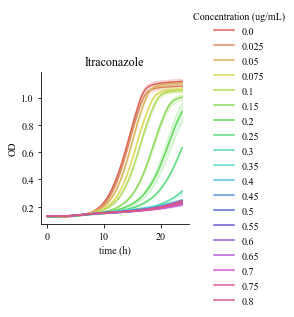

In [9]:
grid = sns.FacetGrid(data=merged_df[merged_df['time (h)'] <=24], hue='conc', palette='hls')
grid.map(sns.lineplot, 'time (h)', 'OD')
#grid.set_titles(col_template='{col_name}')
grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = 'Concentration (ug/mL)')
grid.fig.subplots_adjust(top=0.9)
plt.title(antifungal)
axes = grid.axes.flatten()
plt.savefig('GC_itraconazole_ca.png', format='png', dpi=300)
#plt.savefig('../growth_curve_files/graphs/mica_40h.png', format='png', dpi=300)

## Calculate area under the curve (AUC)

In [9]:
def get_auc(g):
    return np.trapz(g.OD)

In [10]:
aucdf = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_auc).reset_index(name='auc')
condensed_df = plate_df.merge(right=aucdf, on=['well'])
condensed_df.head(3)

,well,strain,conc,auc
0,A1,ERG11-DOX C.a,0.025,50.178000
1,B1,ERG11-DOX C.a,0.025,51.191555
2,C1,ERG11-DOX C.a,0.550,15.405180


## Calculate derivative growth rate (DGR)

In [11]:
def get_derivative_growth_rate(g):
    # rate is multiplied by 4 to convert from /15min (measurements every 15 min) to /h
    data_diff = g.OD.diff()*4
    get_top_5 = data_diff.nlargest(5)    
    growth_rate = np.median(get_top_5)
    return growth_rate

In [12]:
dgr = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_derivative_growth_rate).reset_index(name='dgr')
condensed_df = plate_df.merge(right=dgr, on=['well'])
condensed_df.head(3)

,well,strain,conc,dgr
0,A1,ERG11-DOX C.a,0.025,0.14472
1,B1,ERG11-DOX C.a,0.025,0.14992
2,C1,ERG11-DOX C.a,0.550,0.00948


## Convert concentrations (ug/mL -> uM)

In [13]:
def convert_to_uM(ug, mass_mol):
    # a simple function to convert ug/ml to uM with the molecular weigth of the compound
    vol = 0.001
    uM = (((ug*10**-6)/(vol*mass_mol))*10**6)
    return uM

In [14]:

condensed_df['concentration_uM'] = condensed_df['conc'].apply(lambda x: convert_to_uM(x, molar_mass))
condensed_df

,well,strain,conc,dgr,concentration_uM
0,A1,ERG11-DOX C.a,0.025,0.14472,0.035429
1,B1,ERG11-DOX C.a,0.025,0.14992,0.035429
2,C1,ERG11-DOX C.a,0.550,0.00948,0.779434
3,D1,ERG11-DOX C.a,0.550,0.01068,0.779434
4,A2,ERG11-DOX C.a,0.050,0.14800,0.070858
5,B2,ERG11-DOX C.a,0.050,0.14992,0.070858
6,C2,ERG11-DOX C.a,0.600,0.01312,0.850292
7,D2,ERG11-DOX C.a,0.600,0.01332,0.850292
8,A3,ERG11-DOX C.a,0.075,0.13988,0.106286
9,B3,ERG11-DOX C.a,0.075,0.14040,0.106286


## Convert concentrations (uM -> ug/mL)

In [15]:
def convert_to_ug(uM, mass_mol):
    # a simple function to convert uM to ug/ml with the molecular weigth of the compound
    ug = (uM*mass_mol)/1000
    return ug

## Calculate inhibition coefficient

In [16]:
# Setting the value to be used to calculate the inhibition coefficient
# Either derivative growth rate (fitness_type = 'dgr')
# or normalized AUC parameter (fitness_type = 'norm_auc')
if 'dgr' in condensed_df.columns.tolist():
    fitness_type = 'dgr'
elif 'auc' in condensed_df.columns.tolist():
    fitness_type = 'norm_auc'
else:
    print('Fitness has not been calculated')

In [17]:
def get_inhib_coeff(df, fitness, fitness_type):
    # Inhibition coefficient is calculated either from the derivative growth rate (fitness_type = 'dgr')
    # or the normalized AUC parameter (fitness_type = 'norm_auc')
    ref = df.loc[(df.concentration_uM==0), 'dgr'].mean()
    return (ref - fitness)/ref

In [18]:
condensed_df['inhib_coeff'] = condensed_df['dgr'].apply(lambda x: get_inhib_coeff(condensed_df, x, 'dgr'))
condensed_df.head(3)

,well,strain,conc,dgr,concentration_uM,inhib_coeff
0,A1,ERG11-DOX C.a,0.025,0.14472,0.035429,0.032232
1,B1,ERG11-DOX C.a,0.025,0.14992,0.035429,-0.002541
2,C1,ERG11-DOX C.a,0.550,0.00948,0.779434,0.936606


## Hill equation + fitting

In [19]:
#fit_data = condensed_df[(condensed_df.strain=='LL13-040') & (condensed_df.genotype=='WT') & (condensed_df.concentration_uM!=0) & (condensed_df.concentration_uM<50)][['concentration_uM','replicate','inhib_coeff']]
fit_data = condensed_df[(condensed_df.concentration_uM!=0)].groupby(['concentration_uM'])[['inhib_coeff']].mean().reset_index()
fit_data

,concentration_uM,inhib_coeff
0,0.035429,0.014846
1,0.070858,0.003879
2,0.106286,0.062859
3,0.141715,0.089474
4,0.212573,0.172395
5,0.283431,0.244751
6,0.354288,0.361107
7,0.425146,0.782266
8,0.496004,0.917882
9,0.566861,0.920824


In [20]:
wt_conc = fit_data.concentration_uM.values
wt_inhib = fit_data.inhib_coeff.values

In [21]:
print(wt_conc)
print(wt_inhib)

[0.03542883 0.07085766 0.10628649 0.14171532 0.21257298 0.28343064
 0.35428831 0.42514597 0.49600363 0.56686129 0.63771895 0.70857661
 0.77943427 0.85029193 0.92114959 0.99200726 1.06286492 1.13372258]
[0.01484553 0.00387856 0.06285944 0.08947439 0.17239535 0.24475057
 0.3611074  0.78226561 0.9178815  0.92082386 0.93419821 0.94543266
 0.93259329 0.91159556 0.9424903  0.93433195 0.91012438 0.92336499]


In [22]:
def hill_equation(x, E, n):
    # this function defines the hill equation, where:
    # x is the drug concentration
    # E is the concentration with half effect (IC50)
    # n is the hill coefficient,
    
    return 1/(1+((E/x)**n))

In [23]:
import scipy as sci

# Get best fit parameters (popt) and covariance matrix (pcov)
popt, pcov = sci.optimize.curve_fit(hill_equation, wt_conc, wt_inhib, p0=[0.5,4])
print(popt)
print(pcov)

[0.35572318 4.71637192]
[[1.58360791e-04 1.95822998e-03]
 [1.95822998e-03 4.47100920e-01]]


In [24]:
def get_IC(v, E, n):
    # This function calculates ICv based on IC50 (E) and hill coefficient (n) for any v value between 0 and 1
    return E*((v/(1-v))**(1/n))

In [35]:
ic50_mol = round(get_IC(0.5,popt[0],popt[1]),2)
#This value should be equal to popt[0]
print('IC50 = {} uM'.format(ic50_mol))
ic75_mol = round(get_IC(0.75,popt[0],popt[1]),2)
print('IC75 = {} uM'.format(ic75_mol))

ic10_mol = round(get_IC(0.1,popt[0],popt[1]),2)
#This value should be equal to popt[0]
print('IC10 = {} uM'.format(ic10_mol))

ic5_mol = round(get_IC(0.05,popt[0],popt[1]),2)
#This value should be equal to popt[0]
print('IC5 = {} uM'.format(ic5_mol))

IC50 = 0.36 uM
IC75 = 0.45 uM
IC10 = 0.22 uM
IC5 = 0.19 uM


In [27]:
ic50 = convert_to_ug(ic50_mol, molar_mass)
ic50

0.2540304

In [34]:
ic10 = convert_to_ug(ic10_mol, molar_mass)
ic10

0.1552408

In [36]:
ic5 = convert_to_ug(ic5_mol, molar_mass)
ic5

0.13407159999999999

In [45]:
def get_IC_from_ug(ug, E, n):
    # This function calculates IC based on ug of antifungal
    
    x = (ug*1000)/molar_mass
    return 1/(1+((E/x)**n))

In [53]:
round(get_IC_from_ug(0.25,popt[0],popt[1]),3)


0.495

In [48]:
(0.10*1000)/molar_mass

0.14171532226064282

In [51]:
round(get_IC(0.013,popt[0],popt[1]),3)

0.142

In [28]:
dof = np.size(wt_inhib) - 1 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)
ci_cy = tval*np.sqrt(pcov)[0]
# this little snippet of code allows to calculate the 95% confidence interval on both parameters.
# based on this, we would have IC50 = 9.26 uM +/- 1.18 and hill_coeff = 0.749 +/- 0.019

ci_cy

array([0.02655023, 0.09336333])

In [29]:
interval = convert_to_ug(ci_cy[0], molar_mass)
interval

0.018734905913738855

In [30]:
# now we'll want to plot our curve on top of the data. However, since we'll be plotting on both linear and log
# axis, we need to choose x coordinates across our range of concentrations that are not log-distributed and not 
# linearly distributed
fit_vals = np.logspace(np.log2(wt_conc.min()),np.log2(wt_conc.max()), num=50, base=2)

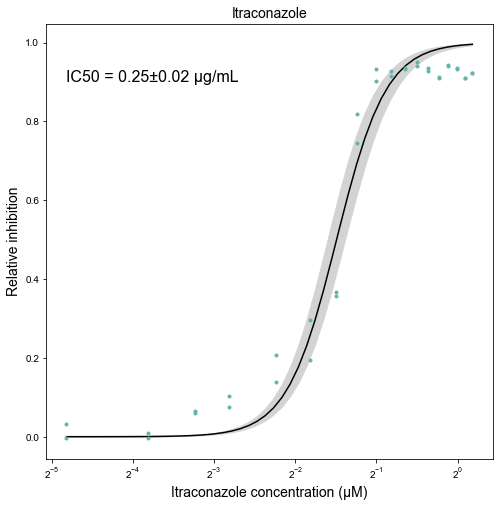

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(8,8))


plt.plot(condensed_df['concentration_uM'],condensed_df['inhib_coeff'], color='#64B3AC', 
         marker='o', ms=3, linestyle='None', zorder=9)

plt.plot(fit_vals, [hill_equation(x,popt[0], popt[1]) for x in fit_vals], 'k')


plt.fill_between(fit_vals, [hill_equation(x,popt[0]+ci_cy[0], popt[1]-ci_cy[1]) for x in fit_vals],
                 [hill_equation(x,popt[0]-ci_cy[0], popt[1]+ci_cy[1]) for x in fit_vals], color='lightgrey')

plt.xscale('log',base=2)

text = "IC50 = " + str(round(ic50,2)) + "\u00B1" + str(round(interval,2)) +" μg/mL"
#text = "\nou " + str(round(ic50_mol,2)) + "\u00B1" + str(round(ci_cy[0],2)) + " $\mu$M\n" + "\nCoefficient de Hill = " + str(round(popt[1],2)) + "\u00B1" + str(round(ci_cy[1],2))+ "\n\nBasé sur le\ntaux de croissance dérivé\naprès 24h"
plt.text(wt_conc.min(), 0.9, text, fontsize=16) 

plt.xlabel(antifungal + " concentration (μM)", fontsize=14)
plt.ylabel('Relative inhibition', fontsize=14)
plt.title(antifungal, fontsize=14)

plt.rcParams['svg.fonttype'] = 'none'
name = "Dose-response_curve_" + antifungal + "_"+ organism + "24H" + "_" + date
plt.savefig(f"c:{name}.png", format='png', dpi=300)
plt.savefig(f"c:{name}.svg", format='svg', dpi=300)